In [1]:
import json

In [6]:
sample = 'C:\Workspace\Aimesoft\Building\Project1_data_tools\data\\training_data\label\\0e81503b1e12fce7b6110cf39419d61c.json'
with open(sample, 'r') as f:
    data = json.load(f)
data.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [25]:
data['imageHeight'], data['imageWidth'] 

(800, 450)

In [13]:
data['shapes'][0]

{'label': 'building',
 'text': '',
 'points': [[109.74576271186442,
   2.5423728813559325,
   294.4915254237288,
   782.2033898305085],
  [294.4915254237288, 782.2033898305085]],
 'group_id': None,
 'shape_type': 'rectangle',
 'flags': {}}

In [19]:
lst = []
classes = ['building', 'power pole', 'cloud']
for shape in data['shapes']:
    l = [classes.index(shape['label'])]
    l.extend(shape['points'][0])
    lst.append(l)
lst

[[0,
  109.74576271186442,
  2.5423728813559325,
  294.4915254237288,
  782.2033898305085],
 [0, 0.0, 84.0, 111.4406779661017, 739.8305084745764],
 [1, 343.64406779661016, 302.5423728813559, 449.0, 444.0],
 [1,
  282.6271186440678,
  400.8474576271186,
  348.7288135593221,
  511.0169491525424],
 [2,
  13.13559322033899,
  2.5423728813559325,
  169.06779661016947,
  187.28813559322035],
 [2, 270.76271186440675, 0.0, 446.0, 302.5423728813559],
 [2,
  102.96610169491527,
  226.27118644067798,
  147.03389830508473,
  400.8474576271186]]

In [20]:
classes = ['building', 'power pole', 'cloud']
classes.index('building')
sample[:-4]

'C:\\Workspace\\Aimesoft\\Building\\Project1_data_tools\\data\\training_data\\label\\0e81503b1e12fce7b6110cf39419d61c.'

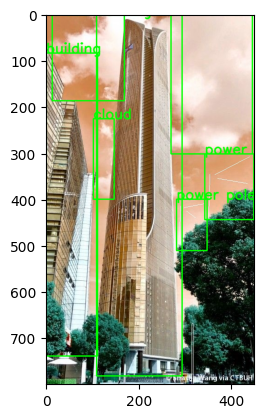

In [23]:
def visualize():
    import cv2
    import matplotlib.pyplot as plt
    image = cv2.imread('C:\Workspace\Aimesoft\Building\Project1_data_tools\data\\training_data\image\\0e81503b1e12fce7b6110cf39419d61c.jpg')
    for i in lst:
        image = cv2.rectangle(image,(int(i[1]), int(i[2])), (int(i[3]), int(i[4])), (0,255,0), 2)
        image = cv2.putText(image, classes[i[0]], (int(i[1]), int(i[2])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    plt.imshow(image)
    # plt.show()
visualize()

In [47]:
import os
label_dir = 'C:\Workspace\Aimesoft\Building\Project1_data_tools\data\\training_data\label'
classes = ['building', 'power pole', 'cloud']
def get_label(file_name):
    with open(os.path.join(label_dir, file_name), 'r') as f:
        data = json.load(f)
    W, H = data['imageWidth'], data['imageHeight']
    lst = []
    for shape in data['shapes']:
        l = [classes.index(shape['label'])]
        x1, y1 = shape['points'][0]
        x2, y2 = shape['points'][1]
        xc = (x1 + x2)/2
        yc = (y1 + y2)/2
        w = abs(x1-x2)
        h = abs(y1-y2)
        x = xc/W
        w = w/W
        y = yc/H
        h = h/H
        l.extend([x, y, w, h])
        lst.append(l)
    return lst
    

In [52]:
output_dir = 'C:\Workspace\Aimesoft\Building\Project1_data_tools\data\\training_data\yolo_label'
def write_txt(file_name):
    lst = get_label(file_name)
    output_name =file_name[:-4] + 'txt'
    with open(os.path.join(output_dir, output_name), 'w') as file:
        for row in lst:
            line = ' '.join(map(str, row))
            file.write(line + '\n')

In [53]:
# get_label(sample)
write_txt('0e81503b1e12fce7b6110cf39419d61c.json')

In [57]:
label_files = os.listdir(label_dir)

from tqdm import tqdm
wrong = []
for file_name in tqdm(label_files):
    try:
        write_txt(file_name)
    except:
        wrong.append(file_name)
        continue
wrong

100%|██████████| 407/407 [00:02<00:00, 139.93it/s]


['0e81503b1e12fce7b6110cf39419d61c.txt']

In [58]:
len(os.listdir(label_dir))
len(os.listdir(output_dir))

406